In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading Fashion-MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Data normalization (converting to the range [0, 1])
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add chanel dimmension (Fashion-MNIST - black and white images)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Converting labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Classes of Fashion-MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


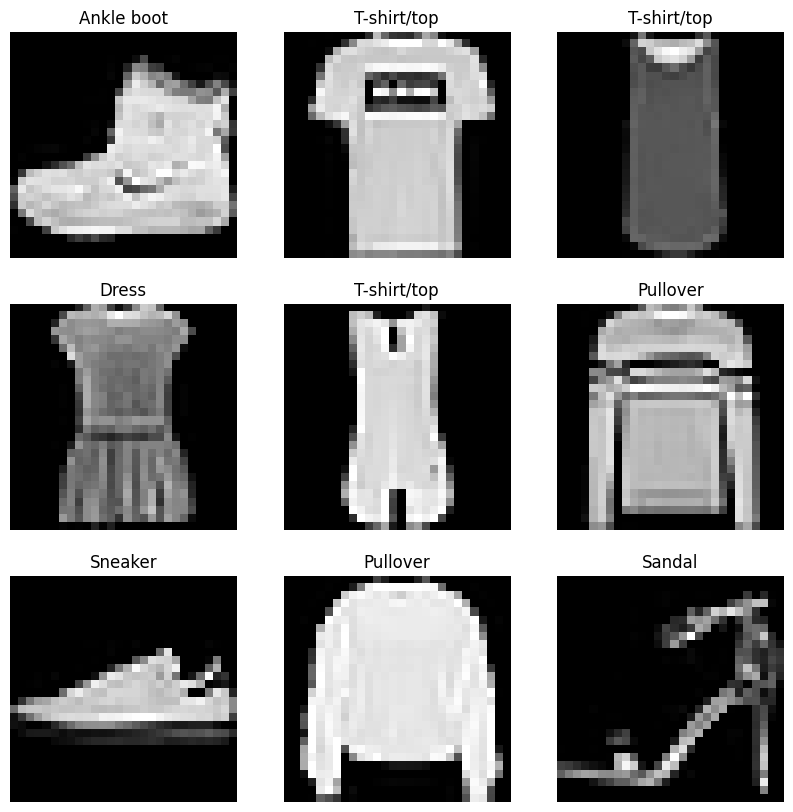

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i].squeeze(), cmap="gray")
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis("off")
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")  # 10 классов
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=64
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 58ms/step - accuracy: 0.6963 - loss: 0.8456 - val_accuracy: 0.8409 - val_loss: 0.4158
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 61ms/step - accuracy: 0.8529 - loss: 0.4101 - val_accuracy: 0.8781 - val_loss: 0.3361
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.8722 - loss: 0.3583 - val_accuracy: 0.8888 - val_loss: 0.3081
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.8837 - loss: 0.3216 - val_accuracy: 0.8970 - val_loss: 0.2805
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.8959 - loss: 0.2884 - val_accuracy: 0.9012 - val_loss: 0.2838
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.9007 - loss: 0.2696 - val_accuracy: 0.9020 - val_loss: 0.2680
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9079 - loss: 0.2517 - val_accuracy: 0.9060 - val_loss: 0.2535
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.9120 - loss: 0.2402 - 

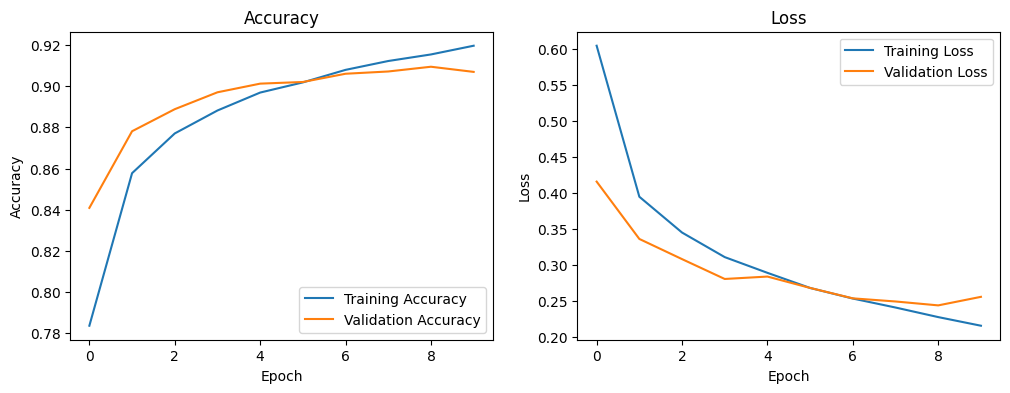

In [ ]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Accurancy
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

plot_training_history(history)

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9051 - loss: 0.2676
Test Accuracy: 90.69%
Test Loss: 0.2556


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


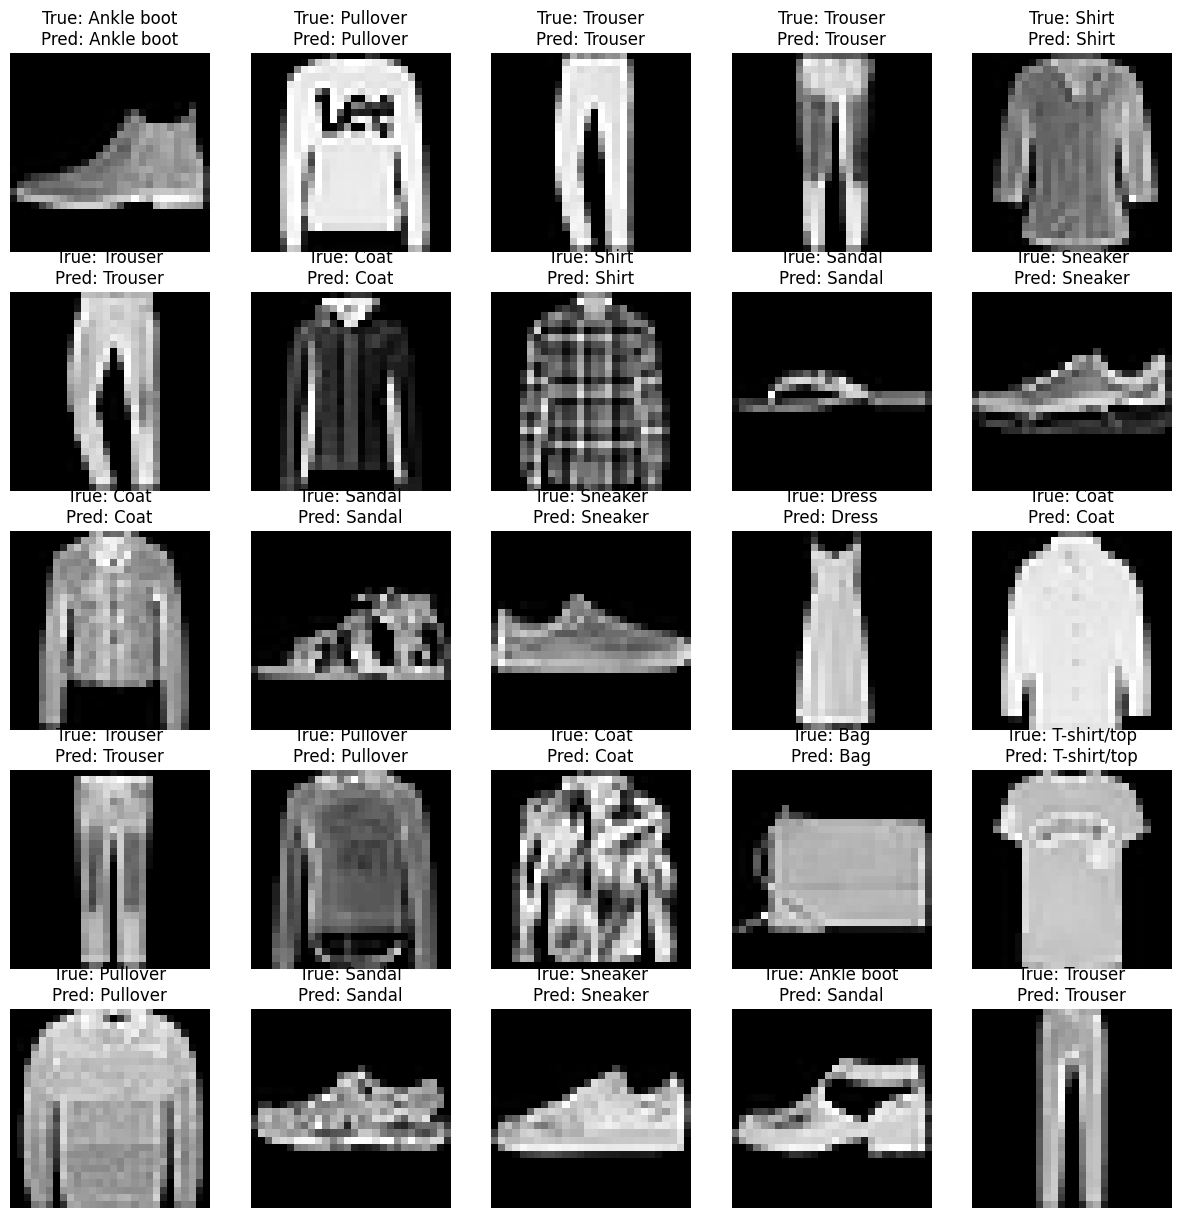

In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
    plt.axis("off")
plt.show()

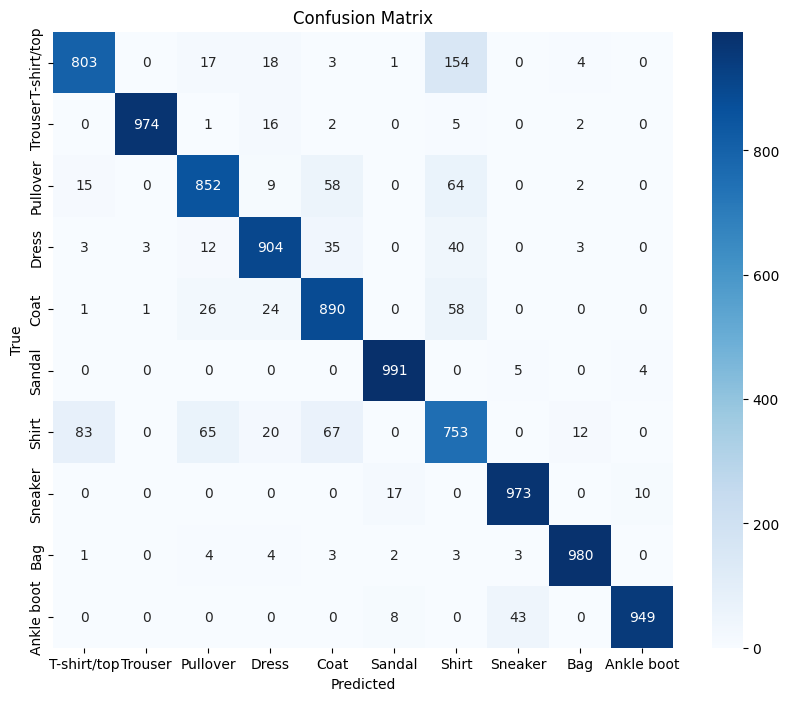

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.89      0.80      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.91      0.90      0.91      1000
        Coat       0.84      0.89      0.86      1000
      Sandal       0.97      0.99      0.98      1000
       Shirt       0.70      0.75      0.73      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
model.save("fashion_mnist_model.keras")

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Download latest version
path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-dataset")

print("Path to dataset files:", path)

100%|██████████| 23.1G/23.1G [09:46<00:00, 42.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1


In [4]:
import pandas as pd

STYLES_CSV_PATH = "/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/styles.csv"
IMAGES_PATH = "/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/images/"


df = pd.read_csv(STYLES_CSV_PATH, on_bad_lines='skip')

print(df.shape)
df.head()

(44424, 10)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [7]:
import os
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split

image_dir = IMAGES_PATH

# Loading images and labels
images = []
labels = []

for index, row in df.iterrows():
    image_path = os.path.join(image_dir, f"{row['id']}.jpg")
    if os.path.exists(image_path):
        img = image.load_img(image_path, target_size=(28, 28), color_mode="grayscale")
        img_array = image.img_to_array(img) / 255.0
        images.append(img_array)
        labels.append(row["masterCategory"])  # using main(master) category

# Converting to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Transforming labels to one-hot encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_one_hot = tf.keras.utils.to_categorical(labels_encoded)

x_train, x_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

In [9]:
from tensorflow.keras.models import load_model

# Loading the pre-trained model
model = load_model("fashion_mnist_model.h5")

# Replace the last layer for the new number of classes
num_classes = len(label_encoder.classes_)
model.pop()
model.add(layers.Dense(num_classes, activation="softmax", name="dense_new"))  # new dense

# Freeze layers to avoid retraining them
for layer in model.layers[:-1]:
    layer.trainable = False

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_new (Dense)                    │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,647 (877.53 KB)

 Trainable params: 903 (3.53 KB)

 Non-trainable params: 223,744 (874.00 KB)

In [10]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,
    batch_size=64
)

Epoch 1/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.4443 - loss: 1.6876 - val_accuracy: 0.7941 - val_loss: 0.6184
Epoch 2/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.7470 - loss: 0.6952 - val_accuracy: 0.8160 - val_loss: 0.5468
Epoch 3/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.7621 - loss: 0.6499 - val_accuracy: 0.8100 - val_loss: 0.5262
Epoch 4/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.7651 - loss: 0.6338 - val_accuracy: 0.8206 - val_loss: 0.5130
Epoch 5/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.7700 - loss: 0.6246 - val_accuracy: 0.8240 - val_loss: 0.5030
Epoch 6/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.7699 - loss: 0.6083 - val_accuracy: 0.8209 - val_loss: 0.4988
Epoch 7/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.7691 - loss: 0.6127 - val_accuracy: 0.8250 - val_loss: 0.4949
Epoch 8/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.7714 - loss: 0.6089 - 

In [12]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

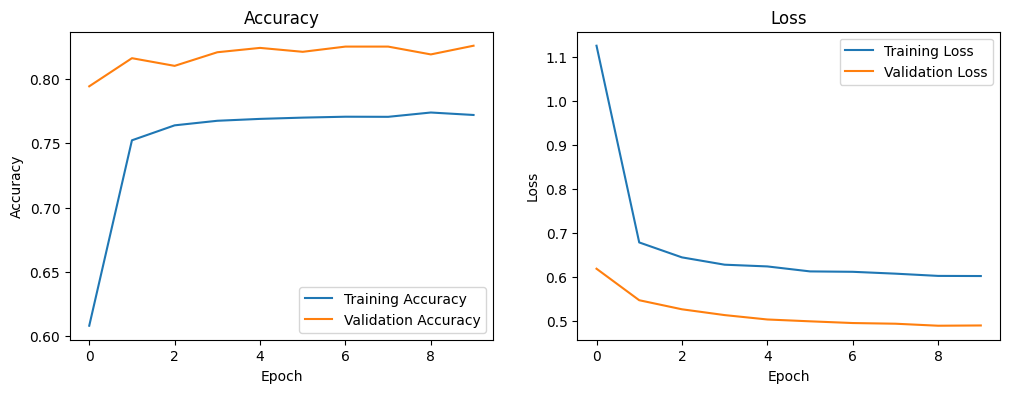

In [13]:
plot_training_history(history)

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8321 - loss: 0.4865
Test Accuracy: 82.56%
Test Loss: 0.4894


278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


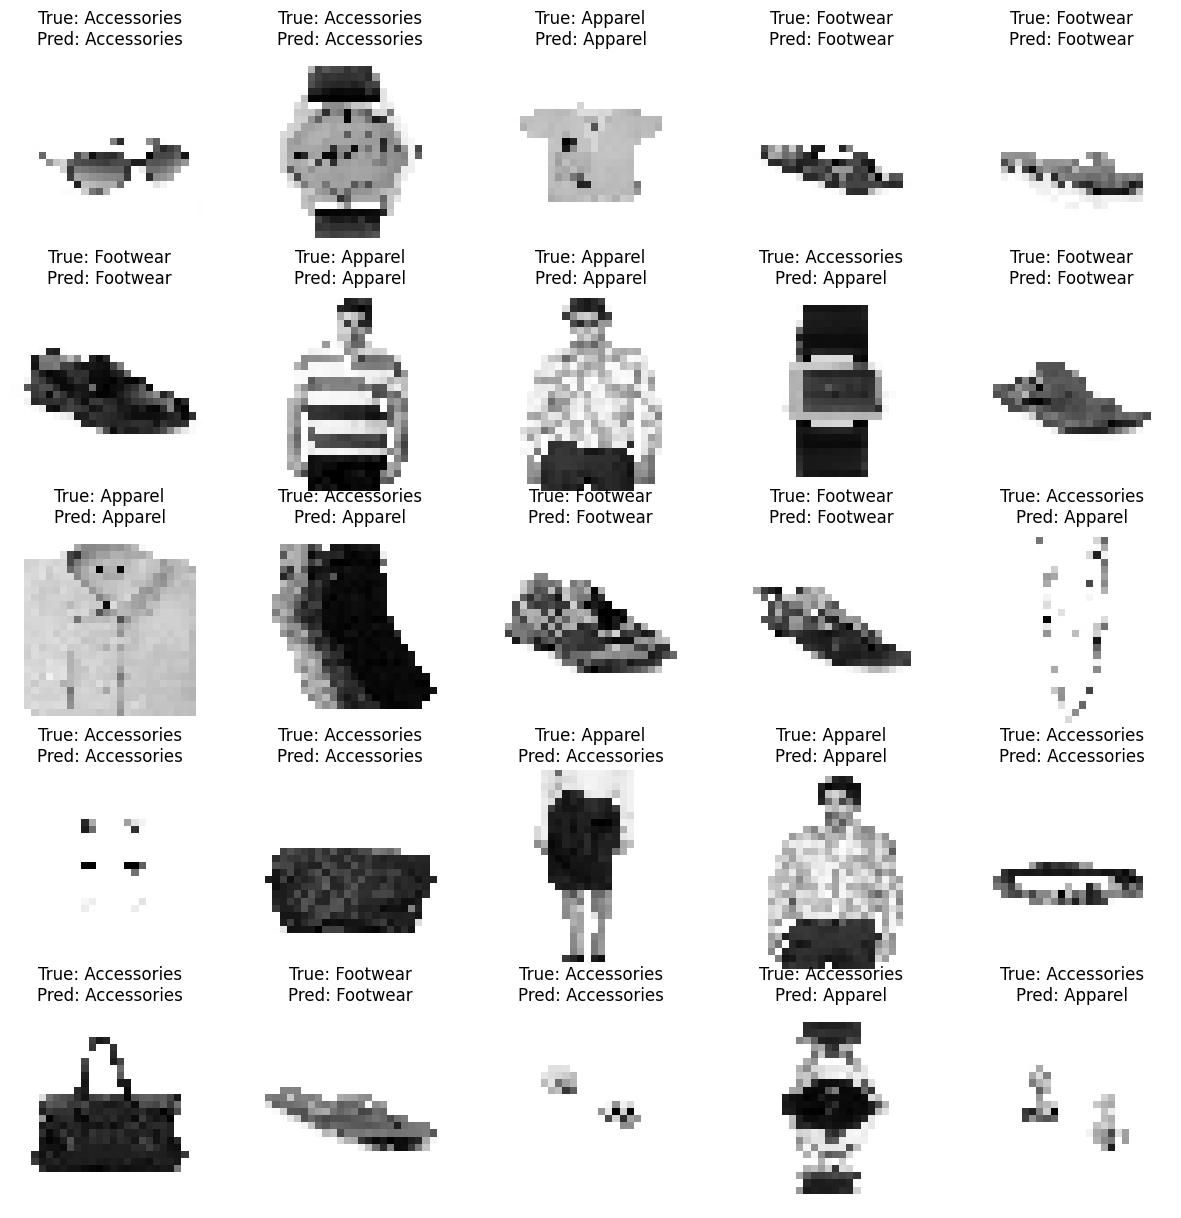

In [15]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    plt.title(f"True: {label_encoder.inverse_transform([true_labels[i]])[0]}\nPred: {label_encoder.inverse_transform([predicted_labels[i]])[0]}")
    plt.axis("off")
plt.show()

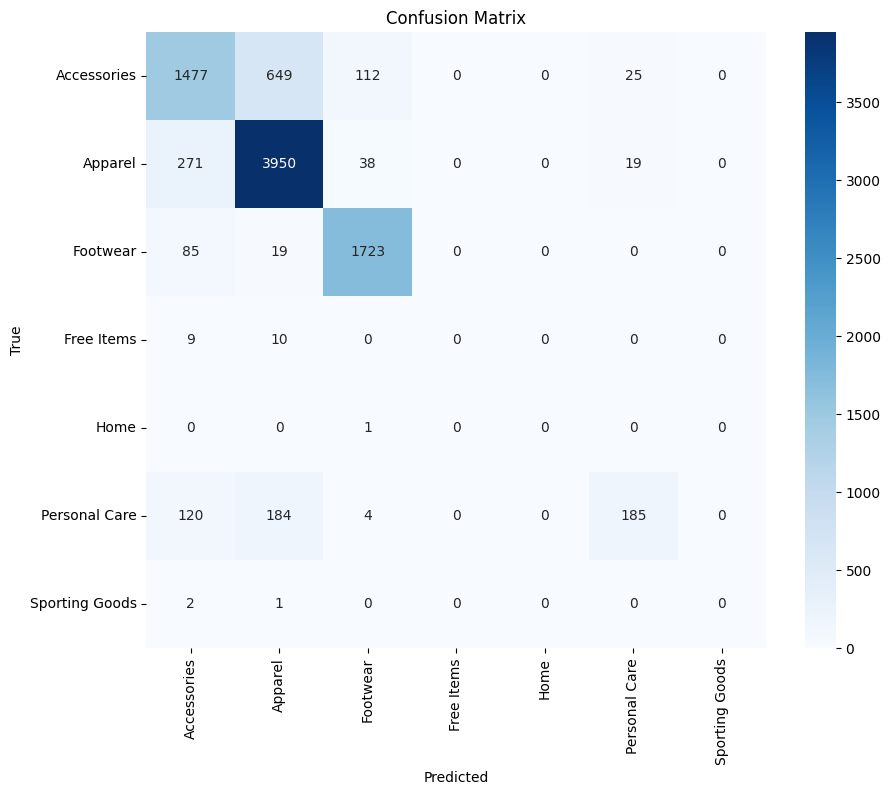

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [19]:
from sklearn.metrics import classification_report

report = classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_)
print(report)

                precision    recall  f1-score   support

   Accessories       0.75      0.65      0.70      2263
       Apparel       0.82      0.92      0.87      4278
      Footwear       0.92      0.94      0.93      1827
    Free Items       0.00      0.00      0.00        19
          Home       0.00      0.00      0.00         1
 Personal Care       0.81      0.38      0.51       493
Sporting Goods       0.00      0.00      0.00         3

      accuracy                           0.83      8884
     macro avg       0.47      0.41      0.43      8884
  weighted avg       0.82      0.83      0.82      8884



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
model.save("fashion_product_images_model.h5")

In [21]:
model.save("fashion_product_images_model.keras")

In [24]:
# Разморозка части слоёв
for layer in model.layers[-50:]:
    layer.trainable = True

# Уменьшение learning rate для тонкой настройки
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_new (Dense)                    │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,647 (877.53 KB)

 Trainable params: 224,647 (877.53 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras import callbacks

#Early stopping
early_stopping = callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

# Reduce learning rate
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.2,  # reduce learning rate in 5 times
    patience=3,
    min_lr=1e-7
)

In [26]:
history_fine_tune = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,  # increased number of epochs
    batch_size=64,
    callbacks=[early_stopping, reduce_lr]  # add callbacks
)

Epoch 1/20
556/556 ━━━━━━━━━━━━━━━━━━━━ 36s 61ms/step - accuracy: 0.7833 - loss: 0.5786 - val_accuracy: 0.8432 - val_loss: 0.4360 - learning_rate: 1.0000e-05
Epoch 2/20
556/556 ━━━━━━━━━━━━━━━━━━━━ 44s 66ms/step - accuracy: 0.8052 - loss: 0.5281 - val_accuracy: 0.8546 - val_loss: 0.4035 - learning_rate: 1.0000e-05
Epoch 3/20
556/556 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - accuracy: 0.8143 - loss: 0.4978 - val_accuracy: 0.8629 - val_loss: 0.3802 - learning_rate: 1.0000e-05
Epoch 4/20
556/556 ━━━━━━━━━━━━━━━━━━━━ 34s 60ms/step - accuracy: 0.8320 - loss: 0.4665 - val_accuracy: 0.8721 - val_loss: 0.3606 - learning_rate: 1.0000e-05
Epoch 5/20
556/556 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - accuracy: 0.8408 - loss: 0.4399 - val_accuracy: 0.8811 - val_loss: 0.3437 - learning_rate: 1.0000e-05
Epoch 6/20
556/556 ━━━━━━━━━━━━━━━━━━━━ 49s 74ms/step - accuracy: 0.8470 - loss: 0.4222 - val_accuracy: 0.8863 - val_loss: 0.3306 - learning_rate: 1.0000e-05
Epoch 7/20
556/556 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/ste

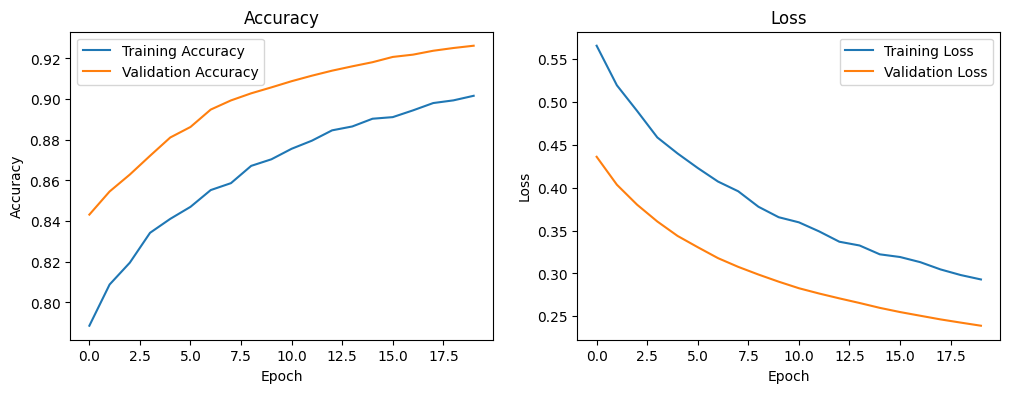

In [27]:
plot_training_history(history_fine_tune)

In [28]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy after fine-tuning: {test_accuracy * 100:.2f}%")
print(f"Test Loss after fine-tuning: {test_loss:.4f}")

278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9311 - loss: 0.2319
Test Accuracy after fine-tuning: 92.63%
Test Loss after fine-tuning: 0.2390


278/278 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


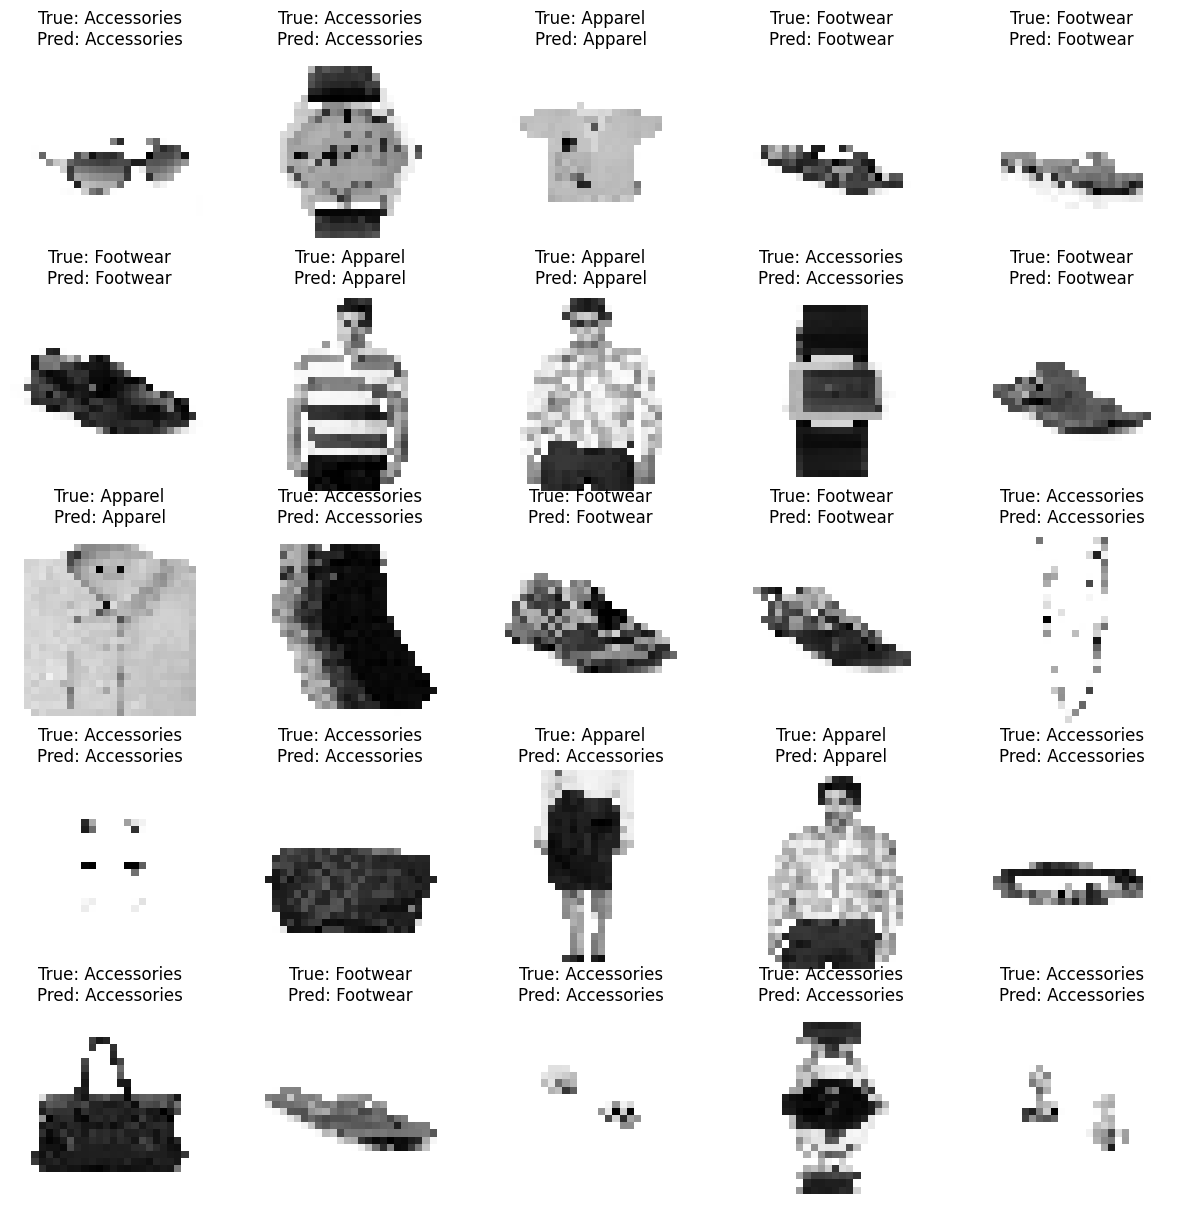

In [29]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap="gray")
    plt.title(f"True: {label_encoder.inverse_transform([true_labels[i]])[0]}\nPred: {label_encoder.inverse_transform([predicted_labels[i]])[0]}")
    plt.axis("off")
plt.show()

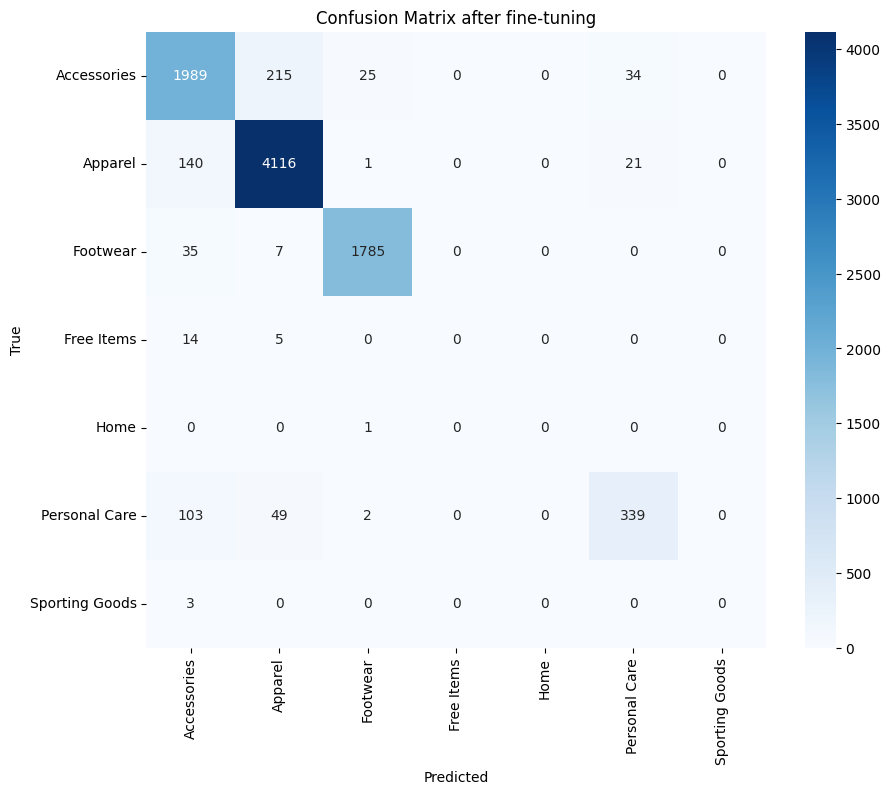

                precision    recall  f1-score   support

   Accessories       0.87      0.88      0.87      2263
       Apparel       0.94      0.96      0.95      4278
      Footwear       0.98      0.98      0.98      1827
    Free Items       0.00      0.00      0.00        19
          Home       0.00      0.00      0.00         1
 Personal Care       0.86      0.69      0.76       493
Sporting Goods       0.00      0.00      0.00         3

      accuracy                           0.93      8884
     macro avg       0.52      0.50      0.51      8884
  weighted avg       0.92      0.93      0.92      8884



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix after fine-tuning")
plt.show()

report = classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_)
print(report)

In [31]:
model.save("improved_fashion_product_images_model.h5")

In [32]:
model.save("improved_fashion_product_images_model.keras")